In [6]:
import pickle
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import QuantileTransformer
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5
from sklearn.metrics import confusion_matrix

In [3]:
df =pd.read_pickle('../pickle_pd/second_pd_top_25.pkl')
features = list(df)[:-1]
labels = df['label'].unique()
qt = QuantileTransformer(random_state=0)
df[features] = qt.fit_transform(df[features])

In [15]:
 X_train, X_test, y_train, y_test = train_test_split( df[features], df['label'], test_size=0.2, random_state=42,shuffle = True)
 #X_test, X_val, y_test, y_val = train_test_split( X_test, y_test, test_size=0.5, random_state=42,shuffle = True)

In [16]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [17]:
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)

In [18]:
print(f'Test accuracy:{accuracy_score(pred_test, y_test)}')
print(f'Train accuracy:{accuracy_score(pred_train, y_train)}')

Test accuracy:0.8476983349657199
Train accuracy:0.8484410558761679


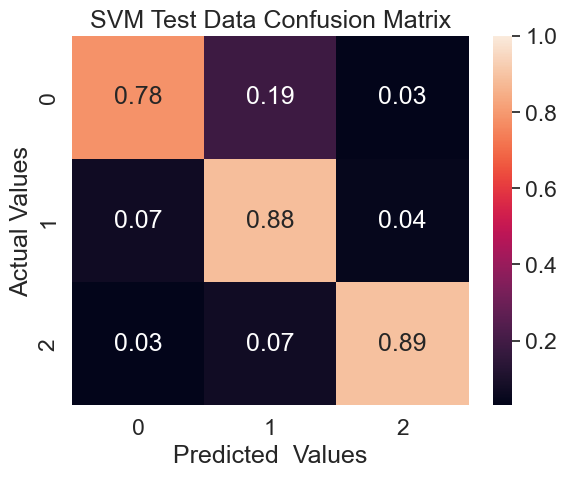

In [19]:
sns.set(font_scale = 1.5)
cm = confusion_matrix(y_test, pred_test)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cmn,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
fig, ax = plt.subplots()
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=list(cm_df), yticklabels=list(cm_df), vmax=1 )
plt.title('SVM Test Data Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted  Values')
plt.show(block=False)

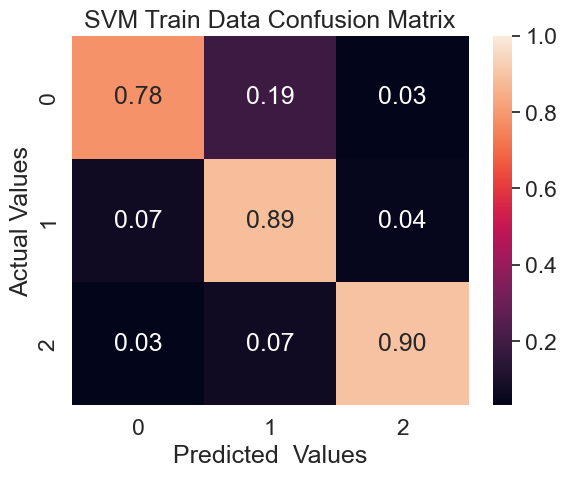

In [23]:
sns.set(font_scale = 1.5)
cm = confusion_matrix(y_train, pred_train)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_df = pd.DataFrame(cmn,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])
fig, ax = plt.subplots()
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=list(cm_df), yticklabels=list(cm_df), vmax=1 )
plt.title('SVM Train Data Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted  Values')
plt.show(block=False)

In [20]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(pred_test, y_test,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.90      0.84     34952
     class 1       0.88      0.79      0.84     44681
     class 2       0.89      0.88      0.89     24509

    accuracy                           0.85    104142
   macro avg       0.85      0.86      0.85    104142
weighted avg       0.85      0.85      0.85    104142



In [24]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(pred_train, y_train,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.90      0.84    139686
     class 1       0.89      0.79      0.84    178410
     class 2       0.90      0.88      0.89     98468

    accuracy                           0.85    416564
   macro avg       0.85      0.86      0.85    416564
weighted avg       0.85      0.85      0.85    416564



In [21]:
accuracy_score(pred_test, y_test)

0.8476983349657199